In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [2]:
rent_df=pd.read_csv("data/Rent_Data.csv")
rent_df.columns = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB
0,2019,2,Albury,Total,Total,220,275,340,623.00,6095.00,-5.17%,1.85%,-16.93%,-5.03%
1,2019,2,Albury,Total,Bedsitter,-,-,-,-,-,-,-,-,-
2,2019,2,Albury,Total,1 Bedroom,165,178,200,50.00,496.00,1.43%,4.41%,-12.28%,11.11%
3,2019,2,Albury,Total,Not Specified,-,-,-,-,214.00,-,-,-,-
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,255.00,2341.00,0.00%,2.17%,-5.56%,0.00%


#### Data Cleaning
* replaced "-" with NaN
* convert numberical columns into float
* get the minimum non 0 value of __First QNB, Second QNB, and Third QNB__
* for replace NaN values with 0, for rows with 9 columns with NaN values
* replace the rest of NaN in __First QNB, Second QNB, and Third QNB__ with minimum value of column minus 1

* __NB Lodged and TB Lodged__ - replaced NaN with 0 and s with minim value of column divided by 2. Due to s means really small value
* remove "%" in __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* convert numerical columns to int except for __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* add __Mean QNB__ column, which is the average of First QNB, Second QNB, and Third QNB.

In [3]:
rent_df = rent_df.replace("-", np.nan)

In [4]:
rent_df["First QNB"] = rent_df["First QNB"].astype(str).astype(float)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(str).astype(float)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(str).astype(float)

In [5]:
### NAN values are replaced with min-1 ###

f_min_val = np.min(rent_df["First QNB"]) - 1
s_min_val = np.min(rent_df["Second QNB"]) - 1
t_min_val = np.min(rent_df["Third QNB"]) - 1

In [6]:
null = []
for x in rent_df.index:#range(len(rent_df.index)):
    null_row = rent_df.loc[x].isnull().sum()
    if null_row == 9:
        null.append(x)
        rent_df.loc[x] = rent_df.loc[x].replace(np.nan, 0)

In [7]:
### NAN values are replaced with min-1 ###

rent_df["First QNB"] = rent_df["First QNB"].replace(np.nan, f_min_val)
rent_df["Second QNB"] = rent_df["Second QNB"].replace(np.nan, s_min_val)
rent_df["Third QNB"] = rent_df["Third QNB"].replace(np.nan, t_min_val)

In [8]:
### replace s  with 1 ###
rent_df = rent_df.replace("s", 1)
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(str).astype(float)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(str).astype(float)

In [9]:
### NAN values are replaced with 0 ###
### s values which mean really small values are replaced with min/2 ###

fq_min_val = np.min(rent_df["NB Lodged"])
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(1, fq_min_val)/2
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(np.nan, 0)

sq_min_val = np.min(rent_df["TB Lodged"])
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(1, sq_min_val)/2
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(np.nan, 0)

In [10]:
### float to int ###
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(int)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(int)

rent_df["First QNB"] = rent_df["First QNB"].astype(int)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(int)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(int)

In [11]:
### remove % sign ###
rent_df['Qtrly Median Change'] = rent_df['Qtrly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly Median Change'] = rent_df['Annly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Qtrly NB'] = rent_df['Qtrly NB'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly NB'] = rent_df['Annly NB'].astype(str).str.extract('(\d+)').astype(float)

### replace nan values for the last 4 columns with 0 ###
rent_df = rent_df.replace(np.nan, 0)

In [12]:
price_df = rent_df[['LGA', 'Dwelling Type', 'Bedroom Number', 'First QNB', 'Second QNB', 'Third QNB']].copy()
price_df['mean'] = price_df.mean(axis=1)

In [13]:
rent_df['Mean QNB'] = np.nan
rent_df['Mean QNB'] = price_df['mean']
rent_df['Mean QNB'] = rent_df['Mean QNB'].astype(int)

#### Top LGAs with highest Rent price

In [14]:
### remove Total column from LGA, and get unique LGA values ###
sort_df = rent_df[rent_df['LGA']!='Total']
top_LGA = sort_df.sort_values(by="Mean QNB", ascending = False)['LGA'].unique()[:10]
top_LGA_arr = []

In [15]:
### Get the Mean QNB per quarter and year of top LGA for graphing ###
for x in range(len(top_LGA)):
    name = top_LGA[x]
    top_LGA_df = rent_df[rent_df['LGA']==top_LGA[x]].sort_values(by="Mean QNB", ascending = False)
    top_LGA_df = top_LGA_df[top_LGA_df['Dwelling Type'] == 'Total']
    top_LGA_df = top_LGA_df[top_LGA_df['Bedroom Number'] == 'Total']
    top_LGA_df = top_LGA_df.sort_values(by=['Year', 'Quarter']) 
    top_LGA_df = top_LGA_df.reset_index()
    for y in top_LGA_df.index:
        if y == 0:
            Q1_15 = top_LGA_df['Mean QNB'].loc[y]
        if y == 1:
            Q2_15 = top_LGA_df['Mean QNB'].loc[y]
        if y == 2:
            Q3_15 = top_LGA_df['Mean QNB'].loc[y]
        if y == 3:
            Q4_15 = top_LGA_df['Mean QNB'].loc[y]
        if y == 4:
            Q1_16 = top_LGA_df['Mean QNB'].loc[y]
        if y == 5:
            Q2_16 = top_LGA_df['Mean QNB'].loc[y]
        if y == 6:
            Q3_16 = top_LGA_df['Mean QNB'].loc[y]
        if y == 7:
            Q4_16 = top_LGA_df['Mean QNB'].loc[y]
        if y == 8:
            Q1_17 = top_LGA_df['Mean QNB'].loc[y]
        if y == 9:
            Q2_17 = top_LGA_df['Mean QNB'].loc[y]
        if y == 10:
            Q3_17 = top_LGA_df['Mean QNB'].loc[y]
        if y == 11:
            Q4_17 = top_LGA_df['Mean QNB'].loc[y]
        if y == 12:
            Q1_18 = top_LGA_df['Mean QNB'].loc[y]
        if y == 13:
            Q2_18 = top_LGA_df['Mean QNB'].loc[y]
        if y == 14:
            Q3_18 = top_LGA_df['Mean QNB'].loc[y]
        if y == 15:
            Q4_18 = top_LGA_df['Mean QNB'].loc[y]
        if y == 16:
            Q1_19 = top_LGA_df['Mean QNB'].loc[y]
        if y == 17:
            Q2_19 = top_LGA_df['Mean QNB'].loc[y]
    top_LGA_arr.append((name, Q1_15, Q2_15, Q3_15, Q4_15, Q1_16, Q2_16, Q3_16, Q4_16, 
                    Q1_17, Q2_17, Q3_17, Q4_17, Q1_18, Q2_18, Q3_18, Q4_18,
                    Q1_19, Q2_19))

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

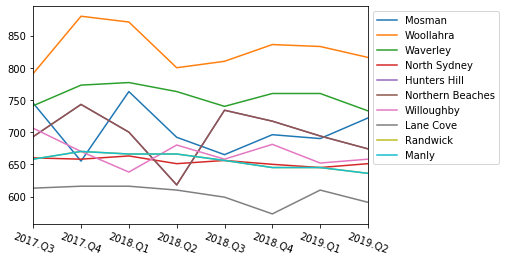

In [16]:
### Graph LGA ###
top_LGA_df = pd.DataFrame.from_records(top_LGA_arr)
top_LGA_df.columns = ['LGA', '2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2', '2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2']
top_LGA_df.index = top_LGA_df['LGA']
top_LGA_df = top_LGA_df.drop('LGA', axis=1)

### remove columns for the graph to look nice ###
top_LGA_df = top_LGA_df.drop(['2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2'], axis=1)
plt.figure(figsize=(15,10)) 
top_LGA_df.transpose().plot()
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

#### Get all LGAs and Mean QNB per year and quarter

In [17]:
LGA_list = sort_df['LGA'].unique()
all_LGA_arr = []

In [18]:
for x in range(len(LGA_list)):
    name = LGA_list[x]
    all_LGA_df = rent_df[rent_df['LGA']==LGA_list[x]].sort_values(by="Mean QNB", ascending = False)
    all_LGA_df = all_LGA_df[all_LGA_df['Dwelling Type'] == 'Total']
    all_LGA_df = all_LGA_df[all_LGA_df['Bedroom Number'] == 'Total']
    all_LGA_df = all_LGA_df.sort_values(by=['Year', 'Quarter']) 
    all_LGA_df = all_LGA_df.reset_index()
    for y in all_LGA_df.index:
        if y == 0:
            Q1_15 = all_LGA_df['Mean QNB'].loc[y]
        if y == 1:
            Q2_15 = all_LGA_df['Mean QNB'].loc[y]
        if y == 2:
            Q3_15 = all_LGA_df['Mean QNB'].loc[y]
        if y == 3:
            Q4_15 = all_LGA_df['Mean QNB'].loc[y]
        if y == 4:
            Q1_16 = all_LGA_df['Mean QNB'].loc[y]
        if y == 5:
            Q2_16 = all_LGA_df['Mean QNB'].loc[y]
        if y == 6:
            Q3_16 = all_LGA_df['Mean QNB'].loc[y]
        if y == 7:
            Q4_16 = all_LGA_df['Mean QNB'].loc[y]
        if y == 8:
            Q1_17 = all_LGA_df['Mean QNB'].loc[y]
        if y == 9:
            Q2_17 = all_LGA_df['Mean QNB'].loc[y]
        if y == 10:
            Q3_17 = all_LGA_df['Mean QNB'].loc[y]
        if y == 11:
            Q4_17 = all_LGA_df['Mean QNB'].loc[y]
        if y == 12:
            Q1_18 = all_LGA_df['Mean QNB'].loc[y]
        if y == 13:
            Q2_18 = all_LGA_df['Mean QNB'].loc[y]
        if y == 14:
            Q3_18 = all_LGA_df['Mean QNB'].loc[y]
        if y == 15:
            Q4_18 = all_LGA_df['Mean QNB'].loc[y]
        if y == 16:
            Q1_19 = all_LGA_df['Mean QNB'].loc[y]
        if y == 17:
            Q2_19 = all_LGA_df['Mean QNB'].loc[y]
    all_LGA_arr.append((name, Q1_15, Q2_15, Q3_15, Q4_15, Q1_16, Q2_16, Q3_16, Q4_16, 
                    Q1_17, Q2_17, Q3_17, Q4_17, Q1_18, Q2_18, Q3_18, Q4_18,
                    Q1_19, Q2_19))

In [19]:
all_LGA_df = pd.DataFrame.from_records(all_LGA_arr)
all_LGA_df.columns = ['LGA', '2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2', '2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2']
all_LGA_df.index = all_LGA_df['LGA']
#all_LGA_df = all_LGA_df.drop('LGA', axis=1)

### remove columns for the graph to look nice ###
all_LGA_df = all_LGA_df.drop(['2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2'], axis=1)

,LGA,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4,2019.Q1,2019.Q2
LGA,,,,,,,,,
Albury,Albury,268,280,283,273,280,280,291,278
Armidale Regional,Armidale Regional,268,280,283,273,280,280,291,278
Ballina,Ballina,268,280,283,273,280,280,291,278
Balranald,Balranald,268,280,283,273,280,280,291,278
Bathurst Regional,Bathurst Regional,268,280,283,273,280,280,291,278


#### Get correlation of all LGAs and Year/Quarter prices

In [21]:
%run scripts/PearsonValue.py

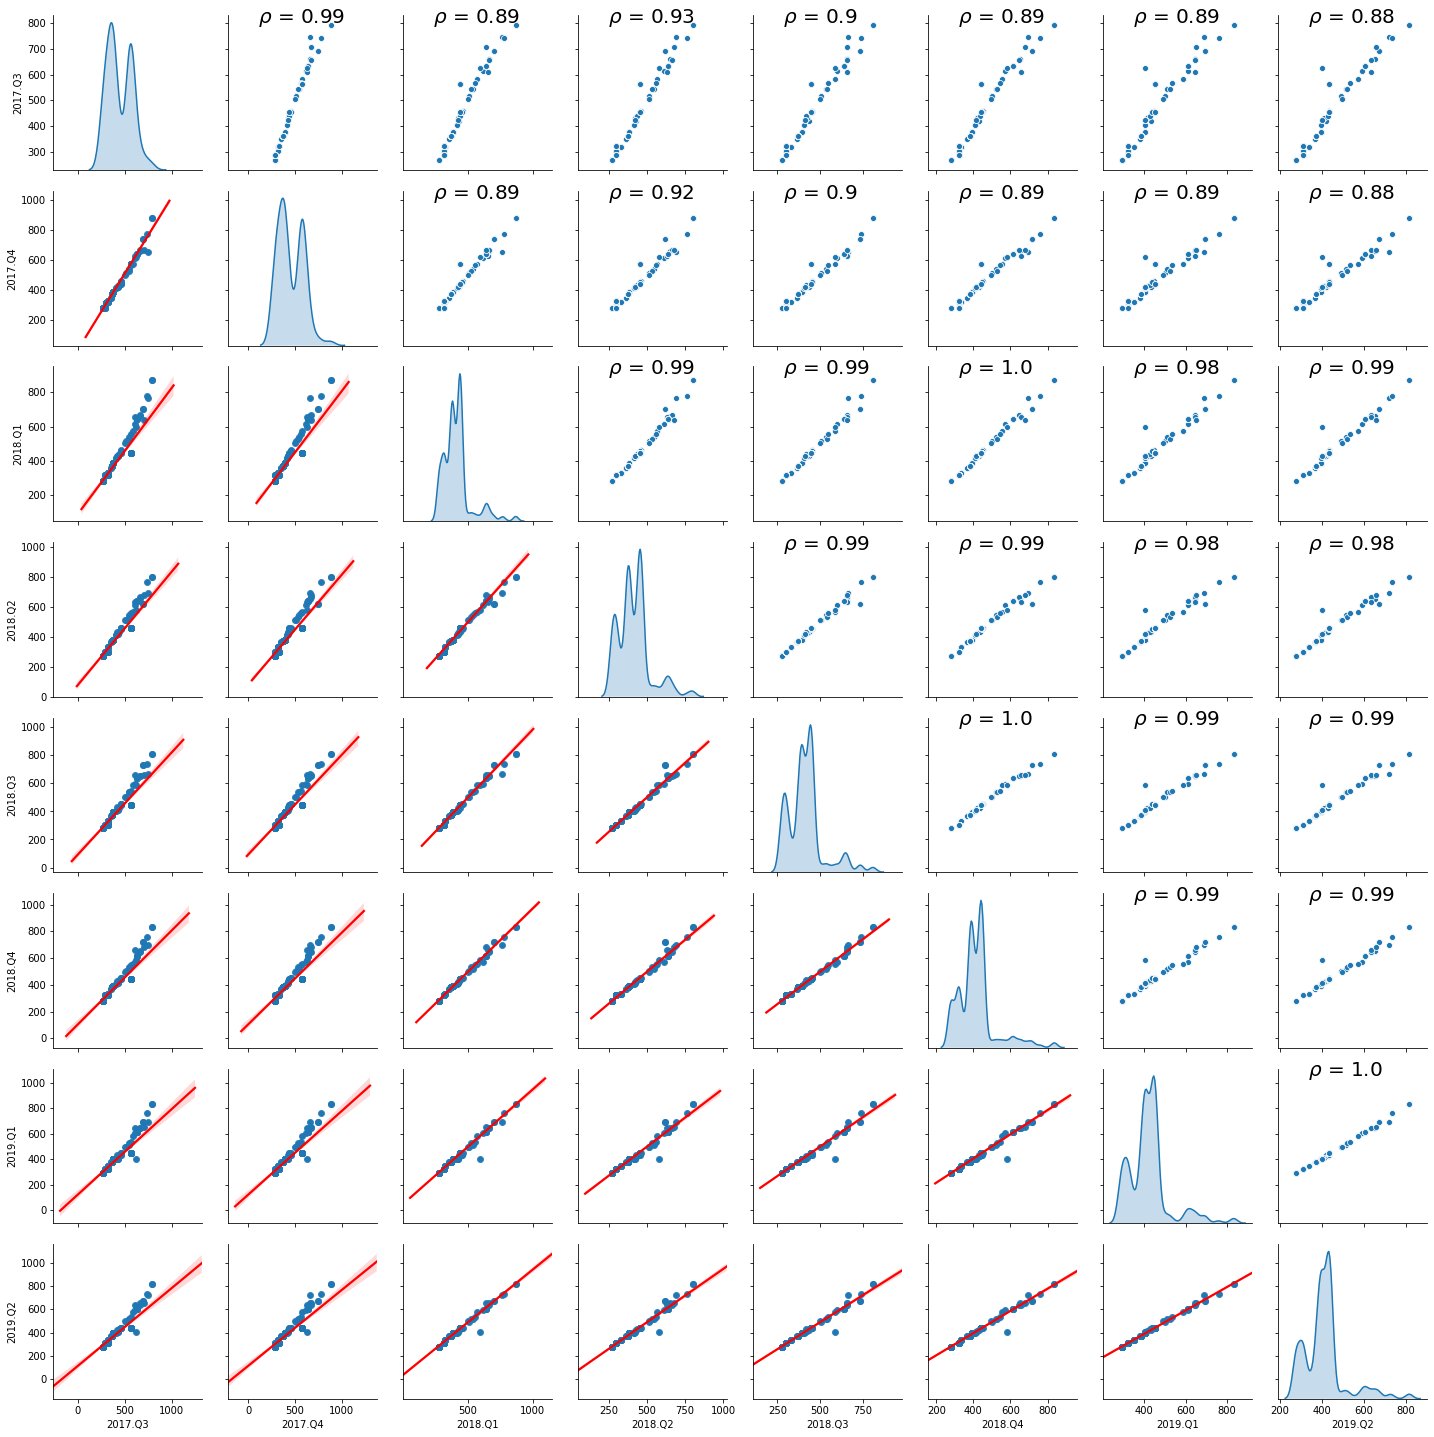

In [22]:
g = sns.pairplot(all_LGA_df,
             vars = ['2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Apply Models and see accruacy score
* Decision Tree
* Random Forest
* Decision Tree - entropy
* SVC

In [23]:
from sklearn.model_selection import train_test_split

cols = np.array(['2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1'])
X = all_LGA_df[cols]
y = all_LGA_df['2019.Q2']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(tree.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(tree.score(X_test, y_test)))

Accuracy in training set:  1.000
Accuracy in testing set:  0.818


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(forest_model.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(forest_model.score(X_test, y_test)))

Accuracy in training set:  0.996
Accuracy in testing set:  0.989


In [28]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

print("Accuracy in training set: {: .3f}". format(clf_entropy.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(clf_entropy.score(X_test, y_test)))

Accuracy in training set:  0.891
Accuracy in testing set:  0.764


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print("Accuracy in training set: {: .3f}". format(svc.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(svc.score(X_test, y_test)))

Accuracy in training set:  0.844
Accuracy in testing set:  0.600


#### Apply Models and see accuracy score for rent_df
* Decision Tree
* Random Forest
* Decision Tree - Entropy
* SVC

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(rent_df['LGA'].unique())
rent_df['LGA']=le.transform(rent_df['LGA']) 

le.fit(rent_df['Dwelling Type'].unique())
rent_df['Dwelling Type']=le.transform(rent_df['Dwelling Type']) 

le.fit(['Total', 'Bedsitter', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 or more Bedrooms', 'Not Specified'])
rent_df['Bedroom Number']=le.transform(rent_df['Bedroom Number']) 

In [ ]:
g = sns.pairplot(rent_df,
             vars = ['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Mean QNB'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(tree.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(tree.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(forest_model.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(forest_model.score(X_test, y_test)))

In [ ]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

print("Accuracy in training set: {: .3f}". format(clf_entropy.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(clf_entropy.score(X_test, y_test)))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print("Accuracy in training set: {: .3f}". format(svc.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(svc.score(X_test, y_test)))